Alunas:
- Letícia Gabriela
- Maria Fernanda Herculano

In [46]:
#------------------------------------------------------------------------------+
#
#   Nathan A. Rooy
#   Simple Particle Swarm Optimization (PSO) with Python
#   July, 2016
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import random
import math
import matplotlib.pyplot as plt


In [47]:
#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
# sphere function http://benchmarkfcns.xyz/benchmarkfcns/spherefcn.html
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

In [48]:
#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.fitness_best_i=-1          # best fitness individual
        self.fitness_i=-1               # fitness individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            # self.position_i.append(x0[i]) # --- forma antiga
            self.position_i.append(random.uniform(bounds[i][0], bounds[i][1])) # MUDANÇA NA FORMA DE INICIALIZAR AS PARTÍCULAS


    # evaluate current fitness
    def evaluate(self,costFunc):
        self.fitness_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.fitness_i<self.fitness_best_i or self.fitness_best_i==-1:
            self.pos_best_i=self.position_i
            self.fitness_best_i=self.fitness_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=2        # cognitive constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i]) # o enxame tem que passar o melhor ponto global
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social


    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # solucionando por truncamento
            # opcao: colocar velocidade negativa (sair das bordas)
            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        fitness_best_g=-1               # best fitness for group
        pos_best_g=[]                   # best position for group
        fitness_history = []  # historical best fitness


        # establish the swarm
        swarm=[] # lista de particulas
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i<maxiter:
            # print (i,fitness_best_g)
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles): # avaliando o fitness e att o best
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].fitness_i<fitness_best_g or fitness_best_g==-1:
                    pos_best_g=list(swarm[j].position_i)
                    fitness_best_g=float(swarm[j].fitness_i)

             # save the best fitness to the history
            fitness_history.append(fitness_best_g)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles): # atualizar velocidade dos individuos
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print ('FINAL:')
        print (pos_best_g)
        print (fitness_best_g)

        self.fitness_history = fitness_history

In [ ]:
#--- RUN ----------------------------------------------------------------------+

initial=[0,5,10,5]               # initial starting location [x1,x2...]
bounds=[(-10,10),(-10,10), (-10,10), (-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1,initial,bounds,num_particles=15,maxiter=80)

#--- END ----------------------------------------------------------------------+

FINAL:
[-0.0009069500517503742, -0.000693510243642069, -0.0012222935818236727, -0.0006457516991290936]
3.214511711501943e-06


# 1. MUDANÇA NA FUNÇÃO DE TESTE

## Usar a função Rastrigin invés de Esfera

In [ ]:
def rastrigin(x):
    A = 10
    total = A * len(x)
    for i in range(len(x)):
        total += x[i]**2 - A * math.cos(2 * math.pi * x[i])
    return total

In [ ]:
initial=[0,5,10,5]               # initial starting location [x1,x2...]
bounds=[(-10,10),(-10,10), (-10,10), (-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]

# Criando uma instância da classe PSO para a função Esfera
pso_esfera = PSO(func1, initial, bounds, num_particles=15, maxiter=80)
fitness_history_esfera = pso_esfera.fitness_history

# Criando uma instância da classe PSO para a função Rastrigin
pso_rastrigin = PSO(rastrigin, initial, bounds, num_particles=15, maxiter=80)
fitness_history_rastrigin = pso_rastrigin.fitness_history

FINAL:
[-6.802589448149897e-07, -6.16312956550064e-07, -3.6763374854738287e-07, -1.2131286933548804e-07]
9.924652777496938e-13
FINAL:
[0.994961295010866, -2.9848552167688682, -0.9949576803509689, -0.9949616615380739]
11.939478416208352


## Criar script que mostre um gráfico do tipo linha com os eixos melhor fitness (eixo Y) e número de iterações (eixo X). Neste gráfico devem estar duas curvas, uma representando a resposta do PSO para a função de custo Esfera e outra representando a resposta para a função de custo Rastrigin (nenhum outro parâmetro deve ser alterado).

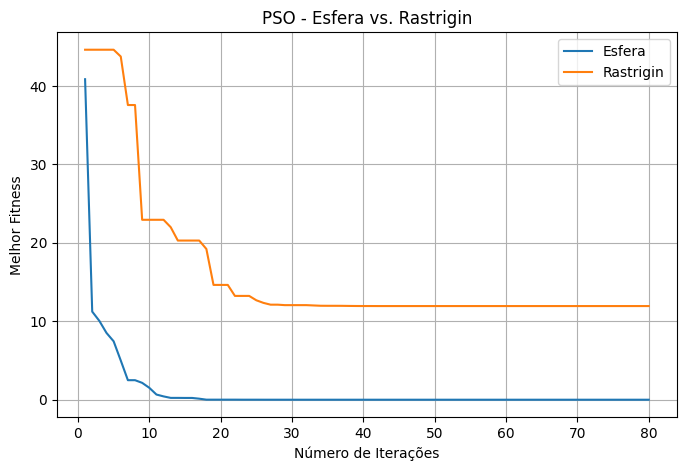

In [ ]:
plt.figure(figsize=(8,5))

plt.title('PSO - Esfera vs. Rastrigin')
plt.plot(range(1, 80 + 1), fitness_history_esfera, label='Esfera')
plt.plot(range(1, 80 + 1), fitness_history_rastrigin, label='Rastrigin')

plt.xlabel('Número de Iterações')
plt.ylabel('Melhor Fitness')

plt.legend()
plt.grid()
plt.show()

# 2. MUDANÇA NA INICIALIZAÇÃO

## Mudar a forma de inicializar as partículas. Cada partícula deve começar em um ponto aleatório dentro do espaço de busca.

In [ ]:
initial=[0,5,10,5]               # initial starting location [x1,x2...]
bounds=[(-10,10),(-10,10), (-10,10), (-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]

pso_original = PSO(rastrigin, initial, bounds, num_particles=15, maxiter=80)
fitness_history_original = pso_original.fitness_history

pso_aleatory = PSO(rastrigin, initial, bounds, num_particles=15, maxiter=80)
fitness_history_aleatory = pso_aleatory.fitness_history

FINAL:
[-7.389674697867256e-07, -0.9949578897768784, -0.9949607698057552, -1.6719663124120705e-06]
1.989918115861883
FINAL:
[0.9949587284511247, -0.9949581513414708, 1.989912299357638, -4.0113679941229396e-07]
5.969749304821976


## Criar script que mostre um gráfico do tipo linha com os eixos melhor fitness (eixo Y) e número de iterações (eixo X). Neste gráfico devem estar duas curvas, uma representando a resposta do PSO com a inicialização em um ponto fixo, e outra representando a resposta com a inicialização aleatória. Deve ser otimizada a função Rastrigin.

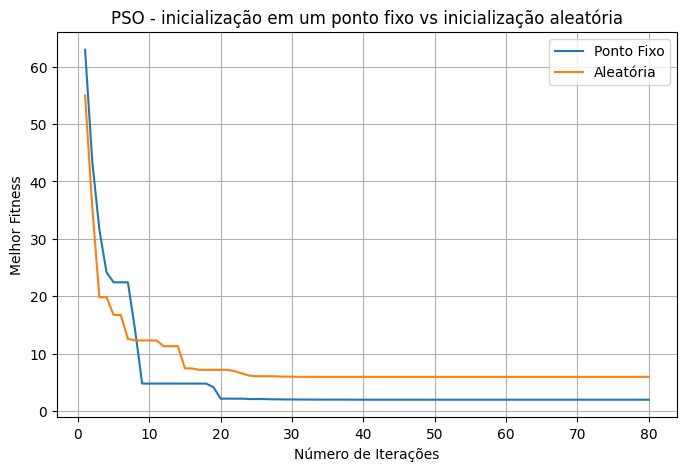

In [ ]:
plt.figure(figsize=(8,5))

plt.title('PSO - inicialização em um ponto fixo vs inicialização aleatória')
plt.plot(range(1, 80 + 1), fitness_history_original, label='Ponto Fixo')
plt.plot(range(1, 80 + 1), fitness_history_aleatory, label='Aleatória')

plt.xlabel('Número de Iterações')
plt.ylabel('Melhor Fitness')

plt.legend()
plt.grid()
plt.show()

# 3. MUDANÇA NA ATUALIZAÇÃO DA VELOCIDADE

##  Mudar a forma de atualizar a velocidade das partículas. Utilizar a fórmula com fator de constrição.

In [49]:
class Particle_new_vel:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.fitness_best_i=-1          # best fitness individual
        self.fitness_i=-1               # fitness individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            # self.position_i.append(x0[i]) # --- forma antiga
            self.position_i.append(random.uniform(bounds[i][0], bounds[i][1])) # MUDANÇA NA FORMA DE INICIALIZAR AS PARTÍCULAS


    # evaluate current fitness
    def evaluate(self,costFunc):
        self.fitness_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.fitness_i<self.fitness_best_i or self.fitness_best_i==-1:
            self.pos_best_i=self.position_i
            self.fitness_best_i=self.fitness_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        # w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=2        # cognitive constant
        c2=2        # social constant

        phi = c1 + c2
        K = 2 / abs(2 - phi - math.sqrt(phi**2 - 4*phi)) # Fator de construcao

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()


            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i]) # o enxame tem que passar o melhor ponto global
            self.velocity_i[i]=K*(self.velocity_i[i]+vel_cognitive+vel_social)

      # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # solucionando por truncamento
            # opcao: colocar velocidade negativa (sair das bordas)
            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]


class PSO_new_vel():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        fitness_best_g=-1               # best fitness for group
        pos_best_g=[]                   # best position for group
        fitness_history = []  # historical best fitness


        # establish the swarm
        swarm=[] # lista de particulas
        for i in range(0,num_particles):
            swarm.append(Particle_new_vel(x0))

        # begin optimization loop
        i=0
        while i<maxiter:
            # print (i,fitness_best_g)
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles): # avaliando o fitness e att o best
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].fitness_i<fitness_best_g or fitness_best_g==-1:
                    pos_best_g=list(swarm[j].position_i)
                    fitness_best_g=float(swarm[j].fitness_i)

             # save the best fitness to the history
            fitness_history.append(fitness_best_g)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles): # atualizar velocidade dos individuos
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print ('FINAL:')
        print (pos_best_g)
        print (fitness_best_g)

        self.fitness_history = fitness_history

In [50]:
initial=[0,5,10,5]                              # initial starting location [x1,x2...]
bounds=[(-10,10),(-10,10), (-10,10), (-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]

# PSO com velocidade padrão
pso_inercia_weight = PSO(func1, initial, bounds, num_particles=15, maxiter=80)
fitness_history_inercia_weight = pso_inercia_weight.fitness_history

# PSO com velocidade com fator de construção
pso_construction_factor = PSO_new_vel(func1, initial, bounds, num_particles=15, maxiter=80)
fitness_history_construction_factor = pso_construction_factor.fitness_history

FINAL:
[6.318197848132315e-07, 1.4817135445835629e-07, -2.608718000993776e-07, 1.7312122755476556e-07]
5.191760462806205e-13
FINAL:
[0.5588410451857682, -1.5001338942560372, -0.7377912211051818, 0.3915113039228524]
3.260322001519352


## Criar script que mostre um gráfico do tipo linha com os eixos melhor fitness (eixo Y) e número de iterações (eixo X). Neste gráfico devem estar duas curvas, uma representando a resposta do PSO com a atualização com fator de constrição e outra representando a reposta da código original. Deve ser otimizada a função Rastrigin e a inicialização deve ser aleatória (alteração 2).

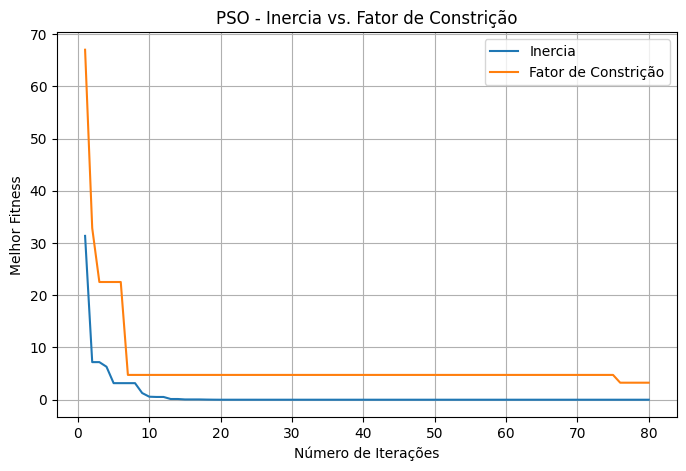

In [51]:
plt.figure(figsize=(8,5))

plt.title('PSO - Inercia vs. Fator de Constrição')
plt.plot(range(1,80+1), fitness_history_inercia_weight, label='Inercia')
plt.plot(range(1,80+1), fitness_history_construction_factor, label='Fator de Constrição')

plt.xlabel('Número de Iterações')
plt.ylabel('Melhor Fitness')

plt.legend()
plt.grid()
plt.show()